In [75]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [76]:
#importing excel file and removing rows with null values
df = pd.read_csv('https://data.ca.gov/dataset/da1978f2-068c-472f-be2d-04cdec48c3d9/resource/7d2f11a4-cc0f-4189-8ba4-8bee05493af1/download/logistics_ppe.csv', dtype={'county': object, 'product_family': object,'quantity_filled': float, 'shipping_zip_postal_code': object, 'as_of_date': object})
df['as_of_date']= pd.to_datetime(df['as_of_date'])  
df = df.dropna(axis=0, subset=['quantity_filled'])
list(df.columns.values)

['county',
 'product_family',
 'quantity_filled',
 'shipping_zip_postal_code',
 'as_of_date']

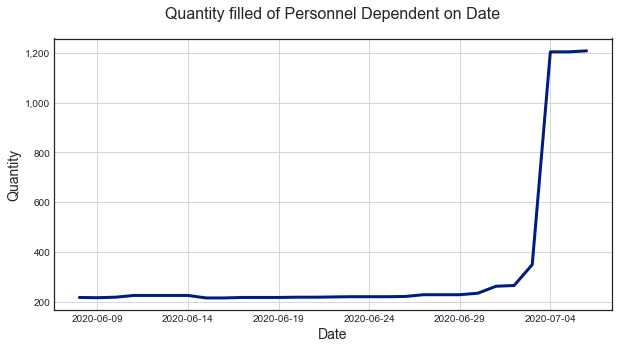

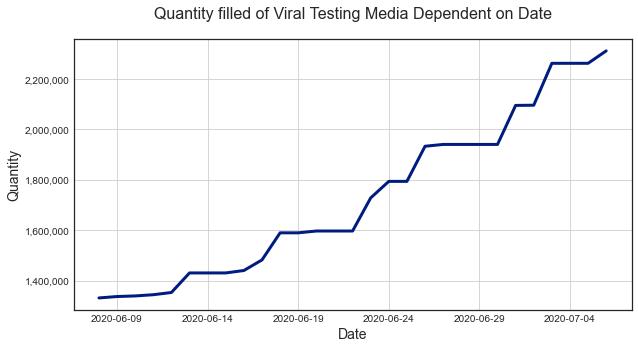

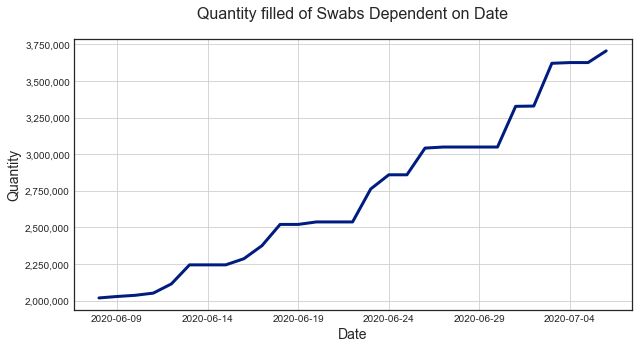

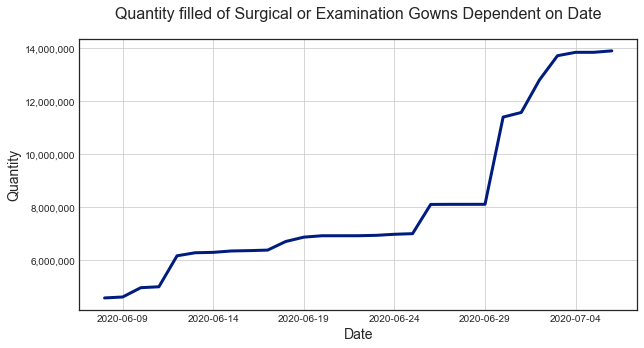

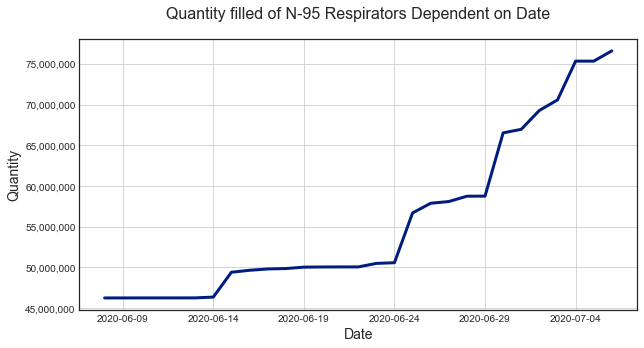

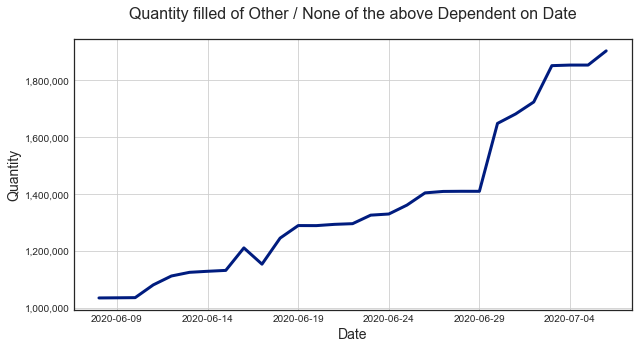

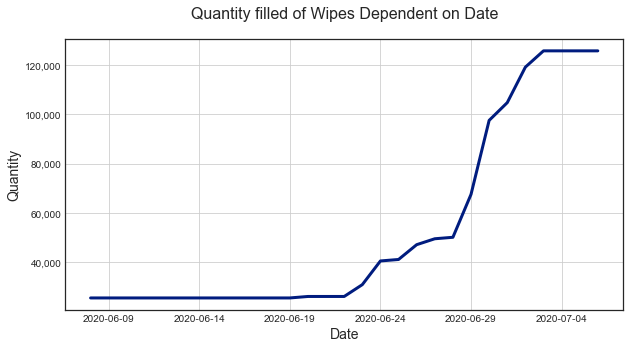

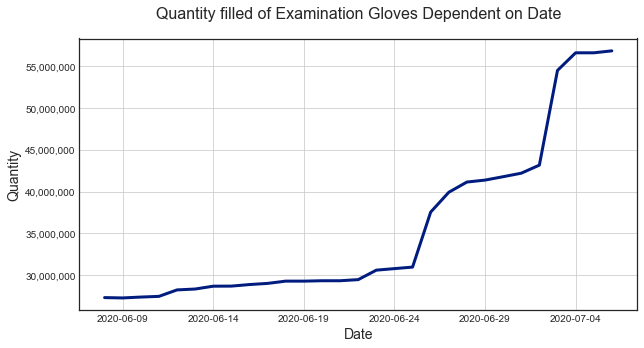

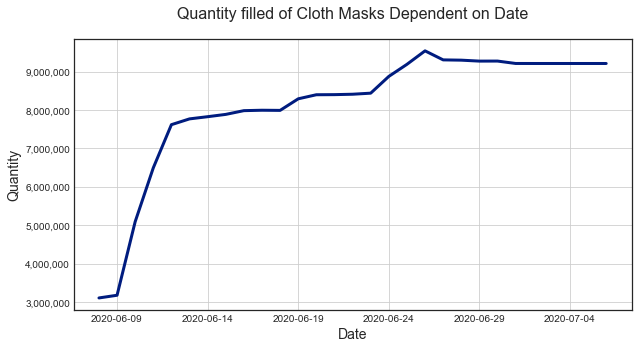

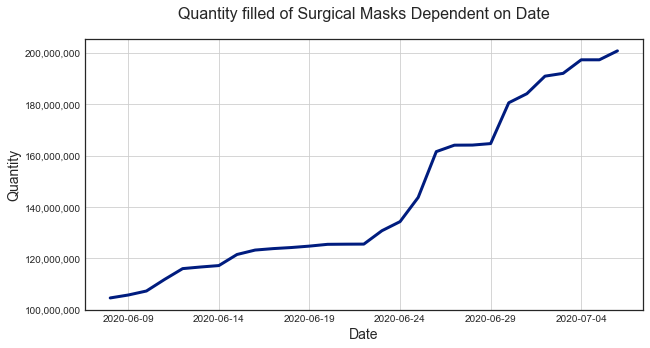

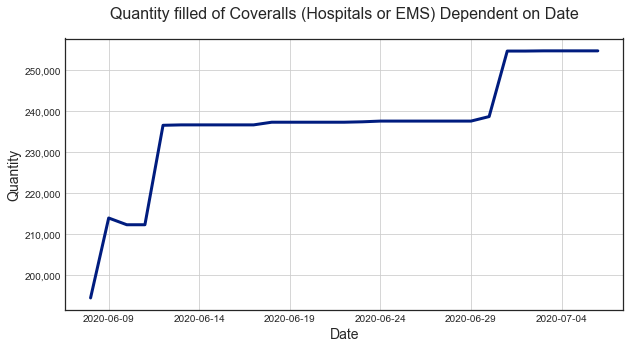

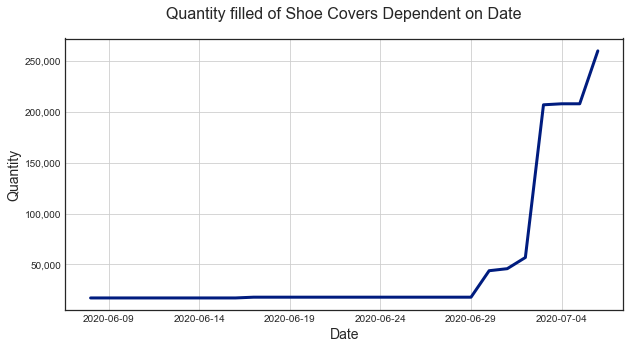

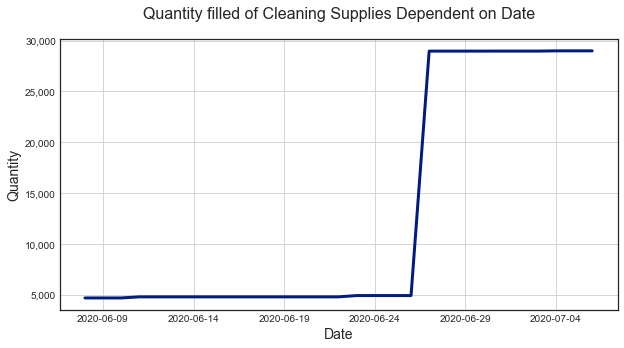

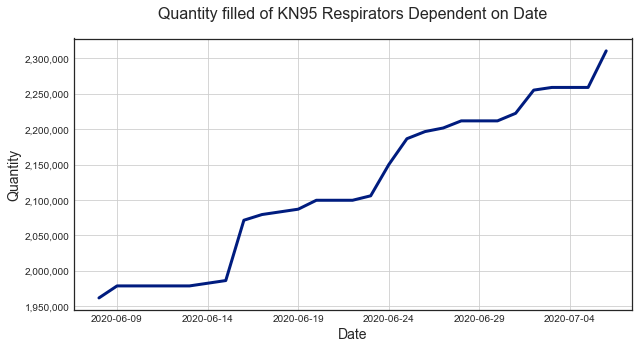

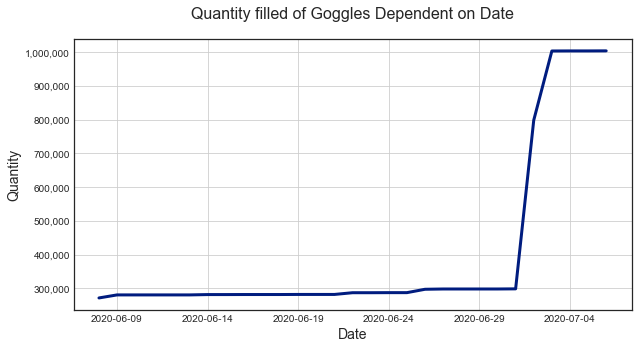

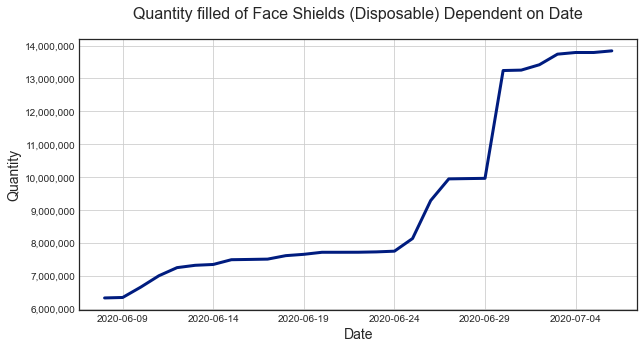

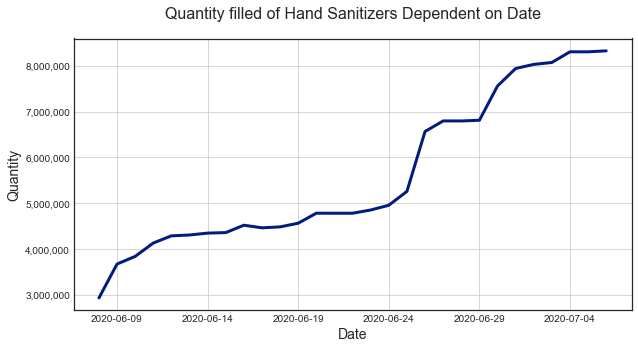

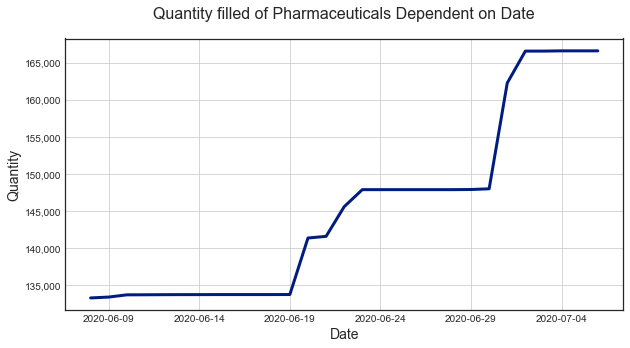

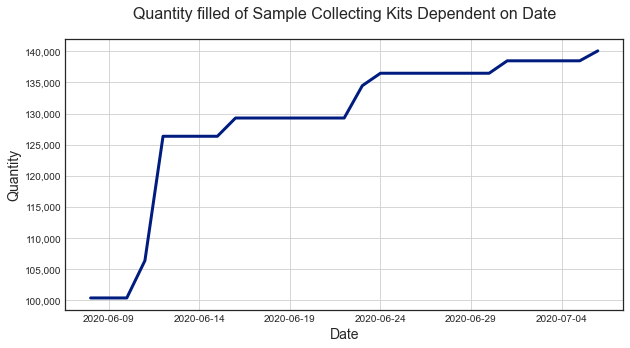

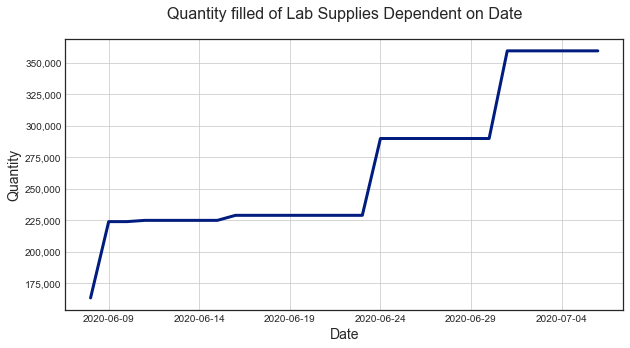

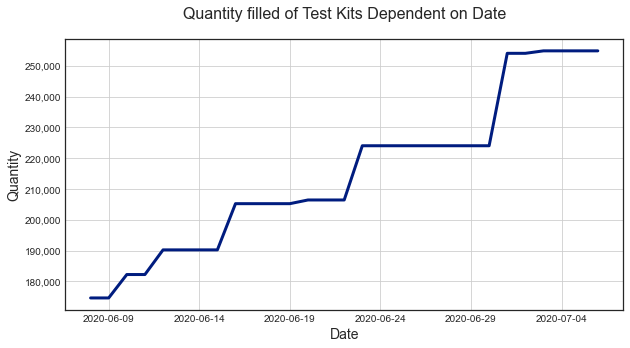

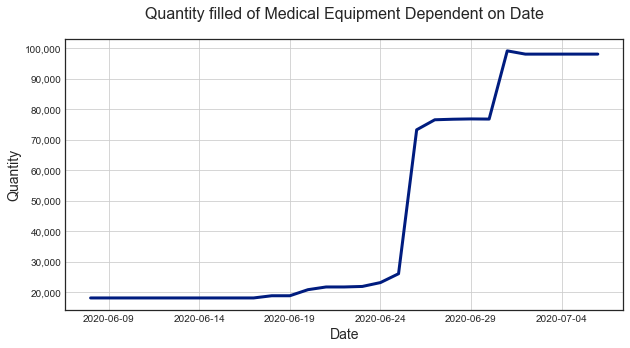

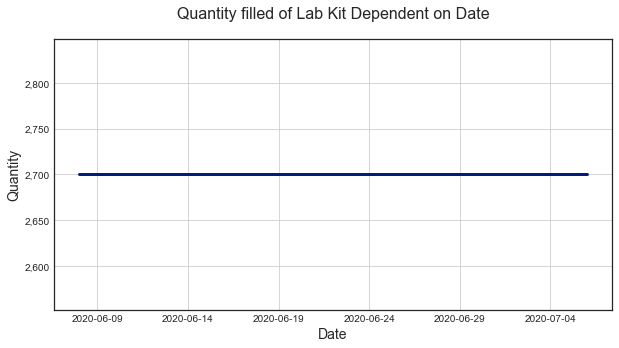

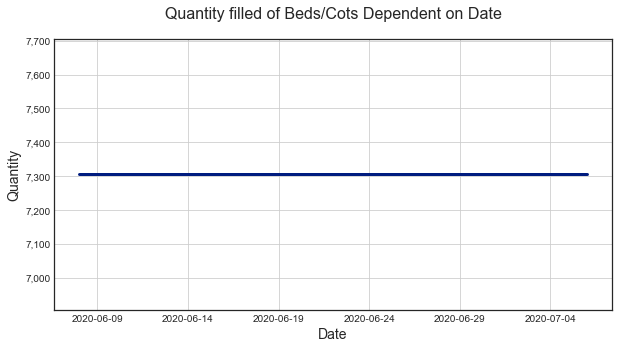

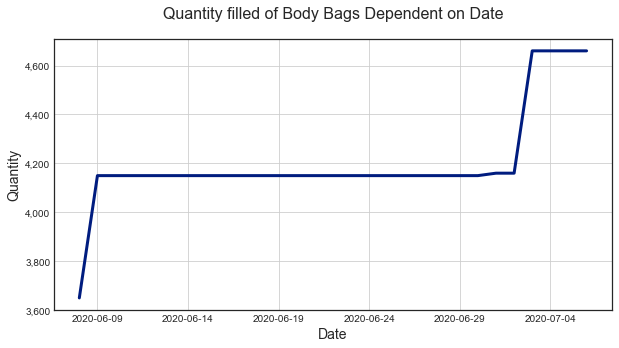

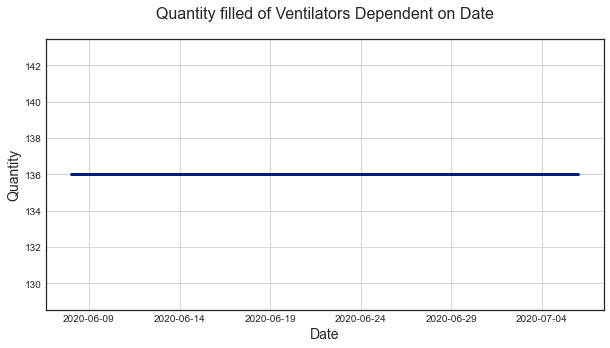

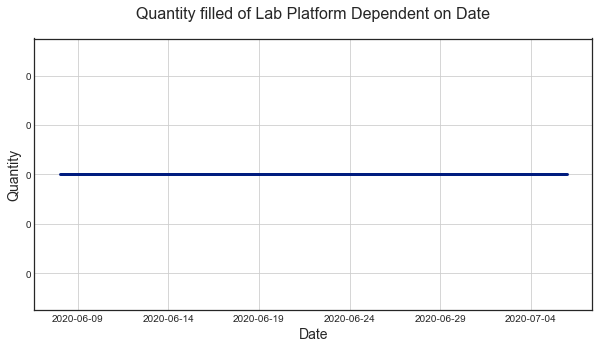

In [79]:
for category in df['product_family'].unique():
    
    #plot configurations
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    
    #plotting quantity filled vs. as of date
    category_df = df.loc[df['product_family'] == category].copy()
    total_filled = category_df.groupby(['as_of_date'])['quantity_filled'].sum().reset_index()
    ax.plot('as_of_date', 'quantity_filled', data=total_filled, linewidth=3, label='Cumulative % of Quantity Filled')
    
    #setting labels
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.title('Quantity filled of ' + category + ' Dependent on Date', fontsize=16, pad=20)
    ax.set_xlabel("Date",fontsize=14)
    ax.set_ylabel("Quantity",fontsize=14)
    ax.grid(True)
    plt.show()